This approach uses deep learning techniques implemented using tensorflow and keras
Official Kaggle score = 0.99

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf

2023-04-14 14:40:30.698226: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-14 14:40:30.761591: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-14 14:40:31.044023: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-14 14:40:31.046122: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-14 14:40:32.518506: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

In [3]:
y_train = train['label'].astype('float32')
X_train = train.drop(['label'], axis=1).astype('int32')
X_test = test.astype('float32')
X_train.shape, y_train.shape, X_test.shape

((42000, 784), (42000,), (28000, 784))

In [4]:
# Data normalization
X_train = X_train/255
X_test = X_test/255

In [5]:
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)
X_train.shape, X_test.shape

((42000, 28, 28, 1), (28000, 28, 28, 1))

In [6]:
# one-hot encoding
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes = 10)
y_train.shape

(42000, 10)

In [7]:
print(train['label'].head())
y_train[0:5,:]

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size = 0.1, random_state=42)

Text(0.5, 1.0, '5')

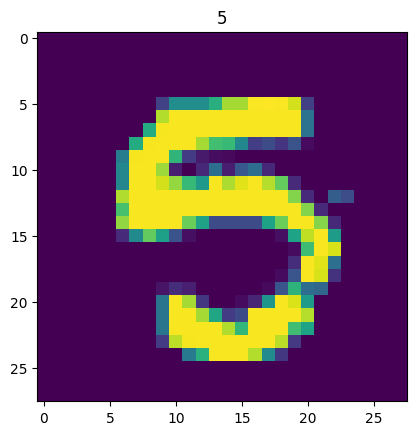

In [9]:
plt.imshow(X_train[1][:,:,0])
plt.title(y_train[1].argmax())

In [10]:
from keras.layers import Input,InputLayer, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout
from keras.models import Sequential,Model
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint,LearningRateScheduler
import keras
from keras import backend as K

In [11]:
# Building a CNN model
input_shape = (28,28,1)
X_input = Input(input_shape)

# layer 1
x = Conv2D(64,(3,3),strides=(1,1),name='layer_conv1',padding='same')(X_input)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2,2),name='maxPool1')(x)
# layer 2
x = Conv2D(32,(3,3),strides=(1,1),name='layer_conv2',padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2,2),name='maxPool2')(x)
# layer 3
x = Conv2D(32,(3,3),strides=(1,1),name='conv3',padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2,2), name='maxPool3')(x)
# fc
x = Flatten()(x)
x = Dense(64,activation ='relu',name='fc0')(x)
x = Dropout(0.25)(x)
x = Dense(32,activation ='relu',name='fc1')(x)
x = Dropout(0.25)(x)
x = Dense(10,activation ='softmax',name='fc2')(x)

conv_model = Model(inputs=X_input, outputs=x, name='Predict')
conv_model.summary()

Model: "Predict"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 layer_conv1 (Conv2D)        (None, 28, 28, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 28, 28, 64)        0         
                                                                 
 maxPool1 (MaxPooling2D)     (None, 14, 14, 64)        0         
                                                                 
 layer_conv2 (Conv2D)        (None, 14, 14, 32)        18464     
                                                           

In [12]:
# Adam optimizer
conv_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
conv_model.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_cv,y_cv))

Epoch 1/10
378/378 [==============================] - 13s 32ms/step - loss: 0.5532 - accuracy: 0.8204 - val_loss: 0.4863 - val_accuracy: 0.9157
Epoch 2/10
378/378 [==============================] - 13s 35ms/step - loss: 0.1430 - accuracy: 0.9596 - val_loss: 0.0752 - val_accuracy: 0.9798
Epoch 3/10
378/378 [==============================] - 12s 33ms/step - loss: 0.1009 - accuracy: 0.9723 - val_loss: 0.0541 - val_accuracy: 0.9833
Epoch 4/10
378/378 [==============================] - 13s 34ms/step - loss: 0.0806 - accuracy: 0.9786 - val_loss: 0.0575 - val_accuracy: 0.9862
Epoch 5/10
378/378 [==============================] - 13s 34ms/step - loss: 0.0689 - accuracy: 0.9812 - val_loss: 0.0556 - val_accuracy: 0.9855
Epoch 6/10
378/378 [==============================] - 14s 37ms/step - loss: 0.0590 - accuracy: 0.9844 - val_loss: 0.0470 - val_accuracy: 0.9893
Epoch 7/10
378/378 [==============================] - 13s 35ms/step - loss: 0.0510 - accuracy: 0.9859 - val_loss: 0.1101 - val_accuracy:

In [13]:
# SGD optimizer
sgd = SGD(lr=0.0005, momentum=0.5, decay=0.0, nesterov=False) 
conv_model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])
conv_model.fit(X_train, y_train, epochs=30, validation_data=(X_cv, y_cv))

Epoch 1/30


/home/adambehun/.local/lib/python3.10/site-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1182/1182 [==============================] - 19s 16ms/step - loss: 0.0286 - accuracy: 0.9917 - val_loss: 0.0383 - val_accuracy: 0.9907
Epoch 2/30
1182/1182 [==============================] - 18s 16ms/step - loss: 0.0251 - accuracy: 0.9928 - val_loss: 0.0376 - val_accuracy: 0.9902
Epoch 3/30
1182/1182 [==============================] - 17s 14ms/step - loss: 0.0257 - accuracy: 0.9928 - val_loss: 0.0375 - val_accuracy: 0.9907
Epoch 4/30
1182/1182 [==============================] - 17s 15ms/step - loss: 0.0246 - accuracy: 0.9935 - val_loss: 0.0373 - val_accuracy: 0.9902
Epoch 5/30
1182/1182 [==============================] - 17s 15ms/step - loss: 0.0227 - accuracy: 0.9940 - val_loss: 0.0372 - val_accuracy: 0.9905
Epoch 6/30
1182/1182 [==============================] - 17s 15ms/step - loss: 0.0201 - accuracy: 0.9948 - val_loss: 0.0375 - val_accuracy: 0.9907
Epoch 7/30
1182/1182 [==============================] - 17s 15ms/step - loss: 0.0203 - accuracy: 0.9949 - val_loss: 0.0372 - val_accura

In [14]:
y_pred = conv_model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)
my_submission = pd.DataFrame({'ImageId': list(range(1, len(y_pred)+1)), 'Label': y_pred})
my_submission.to_csv('submission.csv', index=False)

875/875 [==============================] - 5s 6ms/step
